#Task 1: Event Detection
Find and identify the cause of the >3 sigma drop in ridership, across all time series

In [2]:
#importing packages
import numpy as np
import pandas as pd
import pylab as pl
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#loading MTA fare data in a numpy cube and confirming 
#by printing shape
data=np.load("MTA_Fare.npy")
data.shape
#print data

(600, 23, 194)

In [4]:
#we know there are 600 stations, 23 rider types and 194 weeks of data so
#the first axis must be stations, second axis is ride types, and third
#axis is the week. Renaming to easier-to-use variable names accordingly
stations = (data)
ride_type = (data[0])
week = (data[0][0])

#print length to confirm labels are right
print len(stations)
print len(ride_type)
print len(week)

600
23
194


In [5]:
#printing actual data to see -1 values
#print stations
#print ride_type
#print week

In [6]:
#replace the -1 values with NaNs to allow next steps in the math
clean_data = np.where(data !=-1, data, np.nan)
#print clean_data

In [7]:
station_trips = np.nansum(clean_data, axis=1)
print station_trips.shape

ride_type = np.nansum(clean_data, axis=0)
print ride_type.shape

total_trips = np.nansum(ride_type, axis=0)
print total_trips.shape

(600, 194)
(23, 194)
(194,)


In [8]:
#print total_trips

In [9]:
thresholds = [total_trips.mean() + 3*total_trips.std(), 
              total_trips.mean() - 3*total_trips.std()]
print thresholds

[38733231.136236683, 20829468.606031362]


In [10]:
week_array = pd.date_range(start='05/21/2010', periods=194, freq='W-SUN')
print week_array

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25', 
               ...
               '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22',
               '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19',
               '2014-01-26', '2014-02-02'],
              dtype='datetime64[ns]', length=194, freq='W-SUN', tz=None)


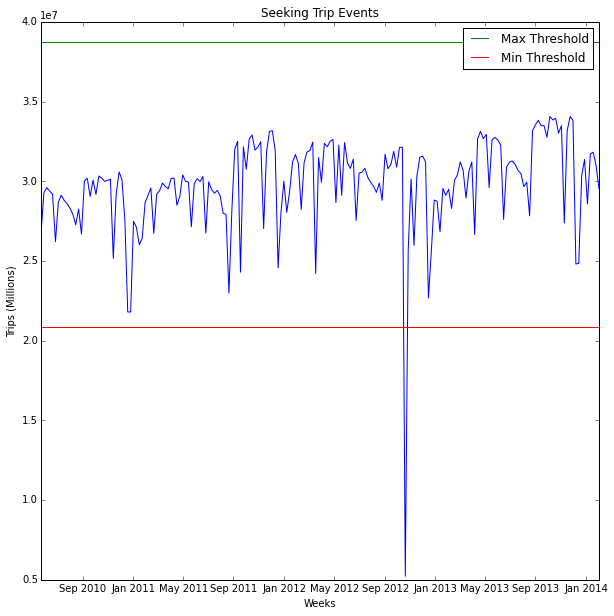

In [11]:
pl.figure(figsize=(10,10))

maxt = np.empty(194); maxt.fill(thresholds[0])
mint = np.empty(194); mint.fill(thresholds[1])

pl.title('Seeking Trip Events')
pl.xlabel('Weeks')
pl.ylabel('Trips (Millions)')
pl.plot(week_array, total_trips)
pl.plot(week_array, maxt, label='Max Threshold')
pl.plot(week_array, mint, label='Min Threshold')
pl.legend()

#There is only one event three standard deviations from the mean - the near-zero number of riders  sometime between 9/2012 and 1/2013. This event is Hurricane Sandy, which shut down many lines of the MTA for days.

One interesting note - there are several other ridership drops that approach the -3 sigma threshold, that look to take place in January and are likely due to snow events.

#Task 2: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. By how much? 

In [27]:
rolling_mean = pd.rolling_mean(np.transpose(ride_type), 10)
#print rolling_mean
print len(rolling_mean)
print len(rolling_mean[0])

194
23


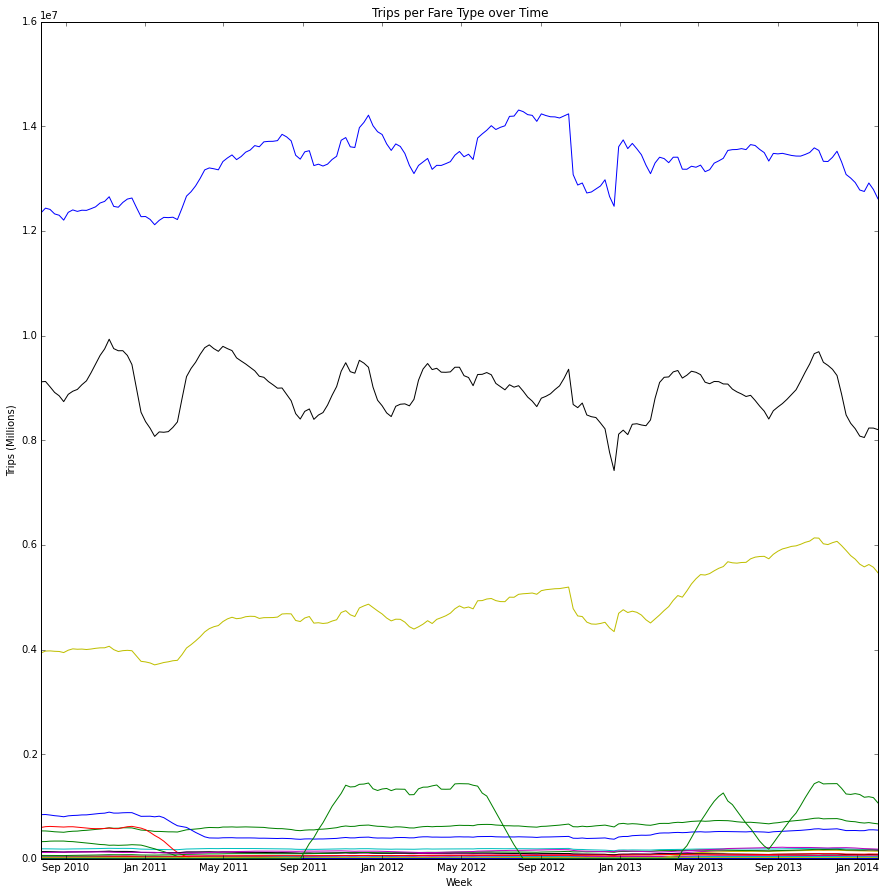

In [28]:
pl.figure(figsize=(15,15))
pl.plot(week_array,rolling_mean)
pl.title('Trips per Fare Type over Time')
pl.xlabel('Week')
pl.ylabel('Trips (Millions)')

In [15]:
change = rolling_mean[193,:]/rolling_mean[10,:]
print change
#print len(change)

[  1.01434717e+00   1.25486522e+00   1.10877424e+00   9.32683421e-01
   1.01713328e+00   1.37693047e+00   8.99159830e-01   2.08001736e-04
   1.06085777e-05   1.46545579e-06   8.08311977e-01   1.20391669e+00
   2.56701071e+04   5.73978265e-01   6.47555504e-01   2.58055231e+00
   2.88011445e+00   1.83024872e+01   1.53125369e+00   1.01938442e+00
   7.93519930e-01   1.61616987e+00              inf]


In [16]:
ride_array = np.array(['10-T','14-D','1-D','2-T','30-D','7-D','ADA','AFAS','EXP','EXPAY','FF','MC','MR','MTHLY','RFM','RR','SEN/DIS','SPEC','TCMC','TKT','UNL','XBUS','STUDENT'])

In [18]:
popular = change >= 1
print popular
print len(popular)
print ride_array[popular]

[ True  True  True False  True  True False False False False False  True
  True False False  True  True  True  True  True False  True  True]
23
['10-T' '14-D' '1-D' '30-D' '7-D' 'MC' 'MR' 'RR' 'SEN/DIS' 'SPEC' 'TCMC'
 'TKT' 'XBUS' 'STUDENT']


In [43]:
#tried to write a for loop to print all the ratios of rider types that increased
#for i in ride_array[popular]:
    #print change[i]

In [44]:
#couldn't figure out for loop so manually printing the ratios
print "The ride types that increased in popularity are"
print ride_array[popular] 
print "The respective ratios, showing increases in rides, are"
print change[0]
print change [1]
print change [2]
print change [4]
print change [5]
print change [11]
print change [12]
print change [15]
print change [16]
print change [17]
print change [18]
print change [19]
print change [21]
print change [22]

The ride types that increased in popularity are
['10-T' '14-D' '1-D' '30-D' '7-D' 'MC' 'MR' 'RR' 'SEN/DIS' 'SPEC' 'TCMC'
 'TKT' 'XBUS' 'STUDENT']
The respective ratios, showing increases in rides, are
1.01434716894
1.2548652163
1.10877423792
1.0171332789
1.37693046911
1.20391668673
25670.1071429
2.58055230755
2.88011444558
18.3024872193
1.53125369499
1.01938442069
1.61616986525
inf


In [45]:
unpopular = change < 1
print ride_array[unpopular]

['2-T' 'ADA' 'AFAS' 'EXP' 'EXPAY' 'FF' 'MTHLY' 'RFM' 'UNL']


In [46]:
print "The ride types that decreased in popularity are"
print ride_array[unpopular] 
print "The respective ratios, showing decreases in rides, are"
print change[3]
print change [6]
print change [7]
print change [8]
print change [9]
print change [10]
print change [13]
print change [14]
print change [20]

The ride types that decreased in popularity are
['2-T' 'ADA' 'AFAS' 'EXP' 'EXPAY' 'FF' 'MTHLY' 'RFM' 'UNL']
The respective ratios, showing decreases in rides, are
0.932683420624
0.899159829548
0.000208001736362
1.06085777322e-05
1.46545578769e-06
0.808311976703
0.573978265015
0.647555503747
0.793519930137


In [47]:
#14 rider types increased over the time studied, while 9 ride 
#types decreased. It looks the STUDENT category is new,
#based on the fact that ridership in this category increased infinitely.

#Task 3: Identify the 4 stations (by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [48]:
station_array = pd.DataFrame(station_trips)
period = np.fft.rfft(station_array)
print len(period)
#print period
print period.shape
#why 600 by 98 and not 194?

600
(600, 98)


In [49]:
periodicity = np.abs(period)
print len(periodicity)

600


In [50]:
weeks = np.fft.rfftfreq(194, 1)
#print weeks
print len(weeks)

98


In [51]:
plot_periods = periodicity[0]
#print plot_periods
print len(plot_periods)
print plot_periods.shape

98
(98,)


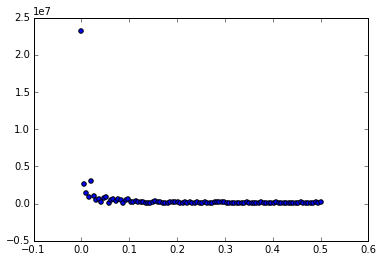

In [52]:
pl.scatter(weeks,plot_periods)